In [9]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import gc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import lightgbm

In [2]:
df_raw = pd.read_csv("train.csv")
df_raw.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
df_raw.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [3]:
df_raw.isna().any()

id                  False
click               False
hour                False
C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dtype: bool

In [7]:
for i in df_raw.select_dtypes(exclude = np.number).columns:
    x = df_raw[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: site_id and it value is: 85f751fd    14596137
1fbe01fe     6486150
e151e245     2637747
d9750ee7      963745
5b08c53b      913325
              ...   
6cc92bb6           1
0f4e5c55           1
7b099edc           1
7e5b4c36           1
65af87eb           1
Name: site_id, Length: 4737, dtype: int64

Column name is: site_domain and it value is: c4e18dd6    15131739
f3845767     6486150
7e091613     3325008
7687a86e     1290165
98572c79      996816
              ...   
e94bb290           1
2d59e137           1
0900747a           1
21ed0be3           1
b83480fe           1
Name: site_domain, Length: 7745, dtype: int64

Column name is: site_category and it value is: 50e219e0    16537234
f028772b    12657073
28905ebd     7377208
3e814130     3050306
f66779e6      252451
75fa27f6      160985
335d28a8      136463
76b2941d      104754
c0dd3be3       42090
72722551       28216
dedf689d       24500
70fb0e29       24224
0569f928       17106
8fd0aea4        7482
a818d37a        3230


<AxesSubplot:xlabel='click', ylabel='count'>

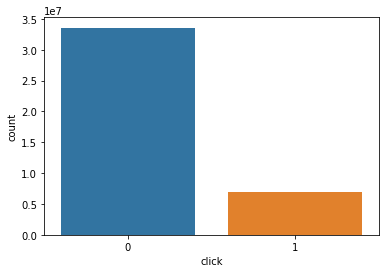

In [10]:
sns.countplot(x="click", data=df_raw)